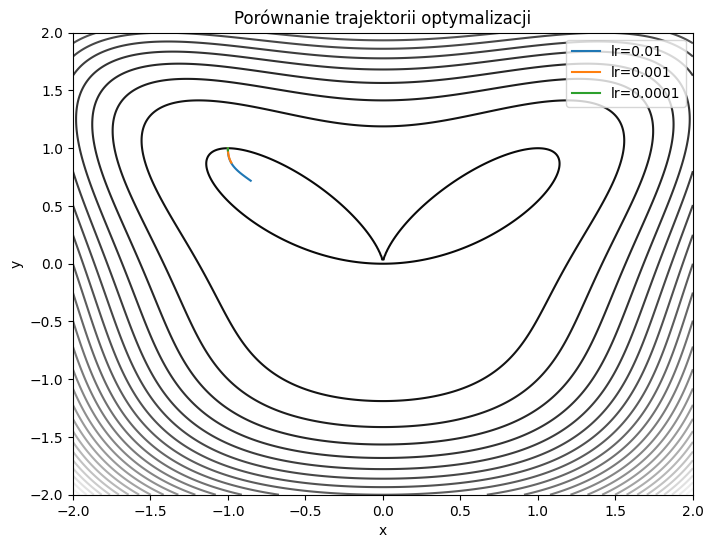

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**4 + y**4 - 2*x**2*y

def grad_f(x, y):
    dx = 4*x**3 - 4*x*y
    dy = 4*y**3 - 2*x**2
    return np.array([dx, dy])

def gradient_descent(lr, steps=100, init=(-1, 1)):
    x, y = init
    trajectory = [(x, y)]
    
    for _ in range(steps):
        grad = grad_f(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        trajectory.append((x, y))

    return np.array(trajectory)

learning_rates = [0.01, 0.001, 0.0001]
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)
plt.contour(X, Y, Z, levels=30, cmap="gray")

for lr in learning_rates:
    path = gradient_descent(lr)
    plt.plot(path[:, 0], path[:, 1], label=f"lr={lr}")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie trajektorii optymalizacji")
plt.show()

c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


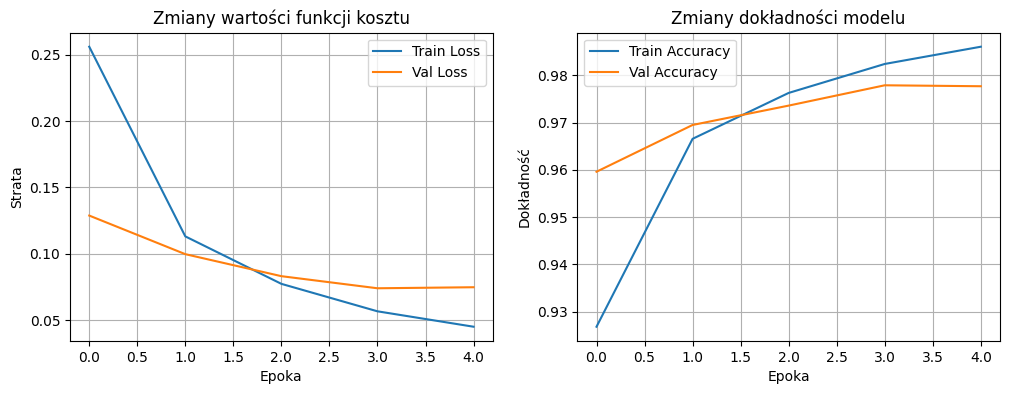

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28*28) / 255.0, x_test.reshape(-1, 28*28) / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Zmiany wartości funkcji kosztu")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
plt.title("Zmiany dokładności modelu")
plt.legend()
plt.grid()

plt.show()